In [1]:
import os
import glob

import pandas as pd
import numpy as np
import datetime

from skimage import io
from datetime import timedelta
from datetime import datetime
from scipy.stats import pearsonr

from netCDF4 import Dataset

# Imports for plotting
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
from matplotlib.dates import MonthLocator
import matplotlib.patheffects as PathEffects

## font sizes

In [2]:
fs_titles = 24
fs_labels = 24
fs_axes = 20
fs_text = 20
fs_legend = 20

## load data histogram dataframe

In [3]:
#mm path
df_h = pd.read_csv('/Users/megmason/Desktop/outputs/histogram_df.csv',index_col=0)

#ars path
# df_h = pd.read_csv('/home/meganmason/Documents/projects/thesis/figures/tables/histogram_df.csv',index_col=0)
# binx = np.arange(0,1000,30) #set bin sizes to have as index
df_h

# pd.to_datetime(df_h.columns[0]).strftime("%Y")

,2014-03-23,2014-04-07,2014-04-13,2014-04-20,2014-04-28,2014-05-02,2014-05-11,2014-05-17,2014-05-27,2014-05-31,...,2015-02-18,2015-03-06,2015-03-25,2015-04-03,2015-04-09,2015-04-15,2015-04-27,2015-05-01,2015-05-28,2015-06-08
0,9063857,10619604,9251924,6864484,16468369,9609206,8931042,7888594,7577341,6673697,...,22954947,23506951,12189601,9620832,37309225,10715793,26449225,8820423,8559890,3868970
30,12225367,12568574,12580394,10506080,15235979,12471667,11342092,9385949,8686070,6320918,...,20780822,23932920,14481451,11042600,32022509,11973704,17805836,8215156,7831775,2780421
60,13991041,13782558,14588733,12323324,14319858,13288906,11453602,7896250,6258951,4293229,...,15642523,19196529,12296243,8568839,17815024,9784246,10960662,6190493,4922594,1809588
90,14907760,14823546,15653023,12875599,13774845,11734685,9263388,5275352,3927475,2743980,...,9625165,12926957,7771005,5245792,11257210,7081329,7415049,4107555,3018075,1188327
120,12872648,15159186,14087416,11053980,11530924,8371376,6120291,3379016,2483326,1762021,...,5134431,7187007,4089993,2847974,7083443,4538978,4688805,2540158,1880972,773598
150,8338913,12805315,9725933,7841138,7944777,5214361,3838524,2228408,1581848,1142197,...,2741517,3663354,2153757,1547169,4193436,2702176,2851747,1536091,1184213,508145
180,4499859,8704326,5614062,5014204,4904557,3140455,2427325,1515449,1034831,756373,...,1523589,1922845,1193896,871229,2437853,1587246,1725676,932254,755665,334704
210,2459000,5139984,3153041,3097146,2980268,1925508,1554573,1060590,689955,511628,...,878782,1062489,689348,506495,1453617,951289,1060485,576866,488703,227344
240,1453428,2980694,1856090,1909028,1854746,1222173,1023668,758938,471193,351048,...,523252,614013,413716,304132,891974,580334,666007,366330,323422,153626
270,913088,1797033,1148560,1198553,1190639,803112,692279,550809,326931,246270,...,318479,365904,250721,188185,567117,365472,429792,235740,217466,103917


In [ ]:
df_h.shape

## plot histograms

In [ ]:
# for column in df_h:
#     plt.figure(figsize=(10,3))
#     df_h[column][:-1].plot.bar(width=0.85, align='edge') #bar plot of each column (minus the last row)
#     plt.title(str(column), fontsize=fs_titles)
#     plt.xlabel('snow depth [cm]', fontsize=fs_axes); plt.ylabel('frequency', fontsize=fs_axes)
#     plt.xlim(-.5,34) #34 is # of bins to display -- 34x30cm = 1000+cm (i.e. 10m)

In [ ]:
# df_h.info()
#print(type(df_h.columns))
#df_h.columns.unique() #nunique for number unique
#df_h.groupby
# pd.to_datetime(df_h.columns[0]).strftime("%Y")
# df_h.groupb

#df_h.set_index(pd.to_datetime(df_h.index), inplace=True)
# for year in df_h:
#     plt.figure(figsize=(5,5))
#     df_h.column.plot.bar(width=0.85, align='edge')



In [4]:
df_h = df_h.T

In [5]:
df_h.set_index(pd.to_datetime(df_h.index), inplace=True) #inplace doesn't make a copy, overwrites
df_h

,0,30,60,90,120,150,180,210,240,270,...,2220,2250,2280,2310,2340,2370,2400,2430,2460,zeros
2014-03-23,9063857,12225367,13991041,14907760,12872648,8338913,4499859,2459000,1453428,913088,...,0,0,0,0,0,0,0,0,0,215673284
2014-04-07,10619604,12568574,13782558,14823546,15159186,12805315,8704326,5139984,2980694,1797033,...,0,0,0,0,0,0,0,0,0,196600831
2014-04-13,9251924,12580394,14588733,15653023,14087416,9725933,5614062,3153041,1856090,1148560,...,0,0,0,0,0,0,0,0,0,208481804
2014-04-20,6864484,10506080,12323324,12875599,11053980,7841138,5014204,3097146,1909028,1198553,...,0,0,0,0,0,0,0,0,0,223368636
2014-04-28,16468369,15235979,14319858,13774845,11530924,7944777,4904557,2980268,1854746,1190639,...,0,0,0,0,0,0,0,0,0,205651079
2014-05-02,9609206,12471667,13288906,11734685,8371376,5214361,3140455,1925508,1222173,803112,...,0,0,0,0,0,0,0,0,0,228900262
2014-05-11,8931042,11342092,11453602,9263388,6120291,3838524,2427325,1554573,1023668,692279,...,0,0,0,0,0,0,0,0,0,240210424
2014-05-17,7888594,9385949,7896250,5275352,3379016,2228408,1515449,1060590,758938,550809,...,0,0,0,0,0,0,0,0,0,256891692
2014-05-27,7577341,8686070,6258951,3927475,2483326,1581848,1034831,689955,471193,326931,...,0,0,0,0,0,0,0,0,0,264632138
2014-05-31,6673697,6320918,4293229,2743980,1762021,1142197,756373,511628,351048,246270,...,0,0,0,0,0,0,0,0,0,273061425


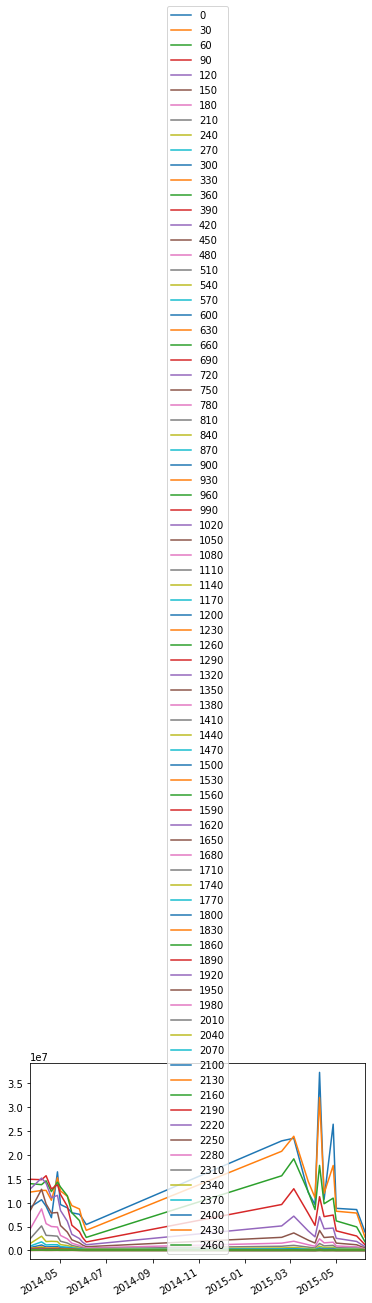

In [28]:

df_h.loc[:, df_h.columns != 'zeros'].plot()


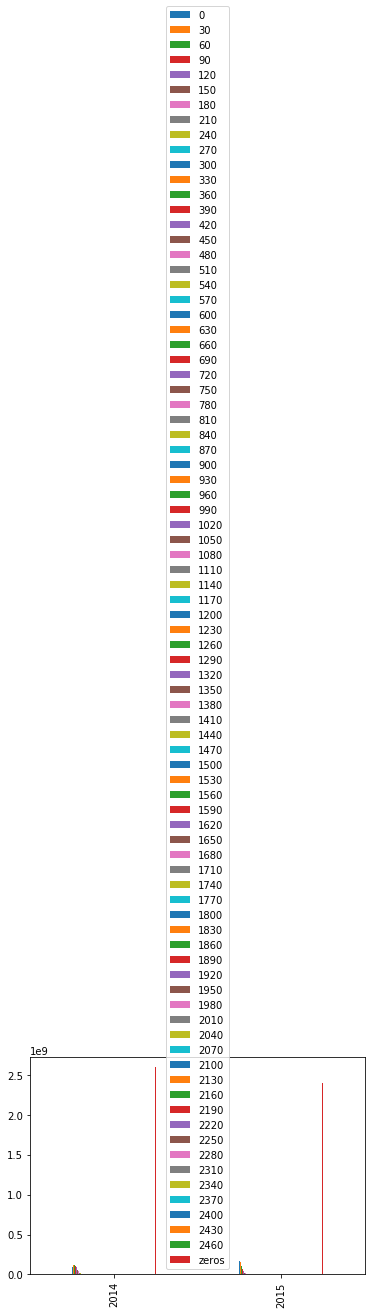

In [31]:
fl_yrs = df_h.groupby(df_h.index.year).sum().plot(kind='bar') #.groups makes dictionary

In [ ]:
fl_yrs

In [ ]:
years=range(2014,2016)

for year in years:
    
    y=df_h.loc[groups[year]]
    print(y)